_**2. WAP to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python. Demonstrate that it can learn the XOR Boolean function.**_

### Explanation of the Codebase

This code implements a Multi-Layer Perceptron (MLP) without using backpropagation with gradient descent. Instead, it updates weights using a Perceptron-like rule and applies a step activation function. The model attempts to learn the XOR Boolean function.

---

### 1. Importing Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

-   `numpy` → For numerical computations.
-   `matplotlib.pyplot` → For plotting the loss curve and decision boundary.
-   `sklearn.metrics` → For evaluating performance (accuracy and confusion matrix).
---

### 2. Defining the MLP Class

The **MLP (Multi-Layer Perceptron)** class initializes, trains, and evaluates a neural network with **one hidden layer**.


#### 2.1 Initialization (`__init__` method)

```python
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        # Initialize weights and biases
        np.random.seed(42)
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        self.loss_history = []
```

##### **What Happens Here?**

-   `input_size` → Number of input neurons (2 for XOR).
-   `hidden_size` → Number of hidden neurons (3 in this case).
-   `output_size` → Number of output neurons (1 for XOR).
-   `learning_rate` → Determines how much weights change per iteration.
-   `epochs` → Number of times the dataset is iterated.

##### **Weight Initialization**

-   `weights_input_hidden` → Random weights between **input and hidden layer**.
-   `weights_hidden_output` → Random weights between **hidden and output layer**.
-   `bias_hidden` → Bias term for the hidden layer, initialized to **zeros**.
-   `bias_output` → Bias term for the output layer, initialized to **zeros**.
-   `loss_history` → Stores loss values for visualization.
---

##### 2.2 Activation Function (`step_function`)
```python
def step_function(self, x):
    return np.where(x >= 0, 1, 0)
```
-   The **step function** outputs:
    -   `1` if input is **≥ 0**.
    -   `0` if input is **< 0**.
-   It is a **binary threshold function**.

🚨 **Limitation:** The step function **does not support gradual weight updates**, making it hard for the model to converge.

---

#### 2.3 Training the MLP (`train` method)
```python
def train(self, X, y):
    for epoch in range(self.epochs):
        # Forward pass
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self.step_function(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        output_layer_output = self.step_function(output_layer_input)
        
        # Compute error
        error = y - output_layer_output
        loss = np.mean(np.abs(error))
        self.loss_history.append(loss)
        
        # Weight update using Perceptron rule
        self.weights_input_hidden += np.dot(X.T, np.dot(error, self.weights_hidden_output.T)) * self.learning_rate
        self.weights_hidden_output += np.dot(hidden_layer_output.T, error) * self.learning_rate
        self.bias_output += np.sum(error, axis=0, keepdims=True) * self.learning_rate
        self.bias_hidden += np.sum(np.dot(error, self.weights_hidden_output.T), axis=0, keepdims=True) * self.learning_rate
        
        # Break if loss is 0
        if loss == 0:
            print(f"Epoch {epoch}: Loss = {loss}")
            break

        # Print loss every 1000 epochs
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: Loss = {loss}")
```
##### **What Happens Here?**

1.  **Forward Pass**
    
    -   Computes activations for hidden and output layers.
    -   Uses the **step function** for activation.
2.  **Error Calculation**
    
    -   `error = y - output_layer_output`
    -   Stores the **absolute loss** for tracking progress.
3.  **Weight Update (Perceptron Rule)**
    
    -   Weights are updated **without backpropagation**.
    -   Uses a **Perceptron-like rule** to update weights.
4.  **Stopping Condition**
    
    -   If `loss == 0`, training **stops early**.
    -   Otherwise, loss is printed every **1000 epochs**.
---

#### 2.4 Predict Function (`predict` method)
```python
def predict(self, X):
    hidden_layer_activation = self.step_function(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
    final_output = self.step_function(np.dot(hidden_layer_activation, self.weights_hidden_output) + self.bias_output)
    return final_output
```
-   **Computes the output for given inputs**.
-   Applies the **step activation function** to generate binary predictions (`0` or `1`).
---

#### 2.5 Model Evaluation (`evaluate` method)
```python
def evaluate(self, X, y):
    predictions = self.predict(X)
    accuracy = accuracy_score(y, predictions)
    conf_matrix = confusion_matrix(y, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(conf_matrix)
```
- Computes accuracy and confusion matrix for model performance.
---

#### 2.6 Loss Curve Plotting (`plot_loss_curve` method)
```python
def plot_loss_curve(self):
    plt.figure()
    plt.plot(self.loss_history, label='Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()
```
- Plots loss over epochs to visualize learning progress.
---
#### 2.7 Decision Boundary Plotting (`plot_decision_boundary` method)
```python
def plot_decision_boundary(self, X, y):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.array([self.predict(np.array([[x, y]])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', marker='o')
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.title("Decision Boundary of XOR MLP")
    plt.show()
```
- Visualizes decision boundaries.
- Shows how the model classifies input space.
---

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        # Initialize weights and biases
        np.random.seed(42)
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        self.loss_history = []
    
    def step_function(self, x):
        return np.where(x >= 0, 1, 0)
    
    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = self.step_function(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            output_layer_output = self.step_function(output_layer_input)
            
            # Compute error
            error = y - output_layer_output
            loss = np.mean(np.abs(error))
            self.loss_history.append(loss)
            
            # Weight update using Perceptron rule
            self.weights_input_hidden += np.dot(X.T, np.dot(error, self.weights_hidden_output.T)) * self.learning_rate
            self.weights_hidden_output += np.dot(hidden_layer_output.T, error) * self.learning_rate
            self.bias_output += np.sum(error, axis=0, keepdims=True) * self.learning_rate
            self.bias_hidden += np.sum(np.dot(error, self.weights_hidden_output.T), axis=0, keepdims=True) * self.learning_rate
            
            # Break if loss is 0
            if loss == 0:
                print(f"Epoch {epoch}: Loss = {loss}")
                break

            # Print loss every 1000 epochs
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}: Loss = {loss}")
    
    def predict(self, X):
        hidden_layer_activation = self.step_function(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        final_output = self.step_function(np.dot(hidden_layer_activation, self.weights_hidden_output) + self.bias_output)
        return final_output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = accuracy_score(y, predictions)
        conf_matrix = confusion_matrix(y, predictions)
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("Confusion Matrix:")
        print(conf_matrix)
        
    def plot_loss_curve(self):
        plt.figure()
        plt.plot(self.loss_history, label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.legend()
        plt.show()

    def plot_decision_boundary(self, X, y):
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = np.array([self.predict(np.array([[x, y]])) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', marker='o')
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.title("Decision Boundary of XOR MLP")
        plt.show()


---

### 3. Running the MLP
- Initializes XOR dataset.
- Trains the MLP with 3 hidden neurons.
- Evaluates accuracy and loss.
- Plots loss curve and decision boundary.

---

Epoch 0: Loss = 0.5
Epoch 59: Loss = 0.0
Accuracy: 100.00%
Confusion Matrix:
[[2 0]
 [0 2]]


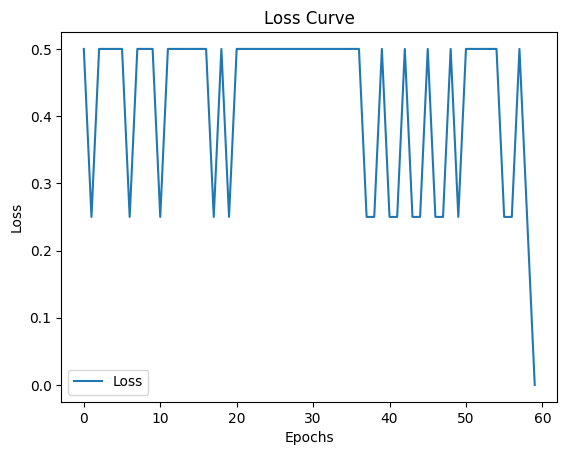

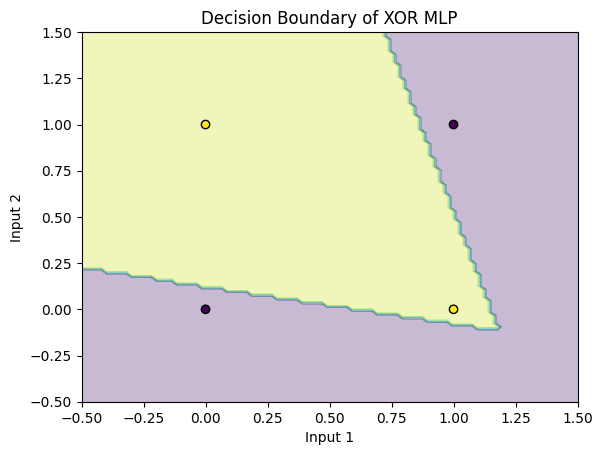

In [ ]:
# Initialize dataset (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train MLP
mlp = MLP(input_size=2, hidden_size=3, output_size=1, learning_rate=0.1, epochs=100000)
mlp.train(X, y)

# Evaluate performance
mlp.evaluate(X, y)
mlp.plot_loss_curve()
mlp.plot_decision_boundary(X, y)

---

### **🚨 Key Issue**

-   The **step function** prevents gradual learning.
-   A **Perceptron-based update** is ineffective for XOR.
-   The model may **not converge** properly.

🚀 **Fix** → Use **sigmoid/tanh activation** with **gradient-based updates** (backpropagation).

---
---

#### `test_mlp` Function is for testing the Model

##### **What does this function do?**

-   Creates an **MLP instance** with:
    -   `hidden_size` (adjustable number of neurons in the hidden layer).
    -   `learning_rate` (how much weights are adjusted during training).
    -   `epochs` (number of training cycles).
-   **Trains the MLP** on the XOR dataset (`X`, `y`).
-   **Evaluates performance**:
    -   Prints **accuracy** and **confusion matrix**.
    -   **Plots loss curve** to show learning progress.
    -   **Visualizes the decision boundary**.


In [ ]:
def test_mlp(hidden_size=2, learning_rate=0.1, epochs=10000):
    # Train MLP
    mlp = MLP(input_size=2, hidden_size=hidden_size, output_size=1, learning_rate=learning_rate, epochs=epochs)
    mlp.train(X, y)
    # Evaluate performance
    mlp.evaluate(X, y)
    mlp.plot_loss_curve()
    mlp.plot_decision_boundary(X, y)

#### **🔍 What is this block testing?**

-   **How the number of hidden neurons affects learning**.
-   **Checks if adding more neurons improves accuracy**.
-   **Observes how different hidden sizes impact decision boundaries**.
---

Learning Start with hidden size:- 1
Epoch 0: Loss = 0.5
Epoch 1000: Loss = 0.5
Epoch 2000: Loss = 0.5
Epoch 3000: Loss = 0.5
Epoch 4000: Loss = 0.5
Epoch 5000: Loss = 0.5
Epoch 6000: Loss = 0.5
Epoch 7000: Loss = 0.5
Epoch 8000: Loss = 0.5
Epoch 9000: Loss = 0.5
Accuracy: 50.00%
Confusion Matrix:
[[0 2]
 [0 2]]


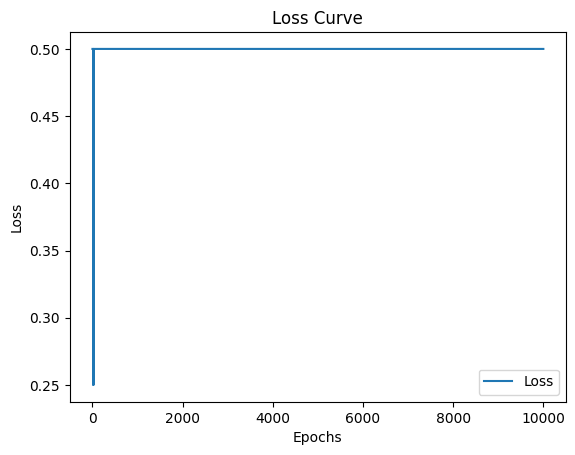

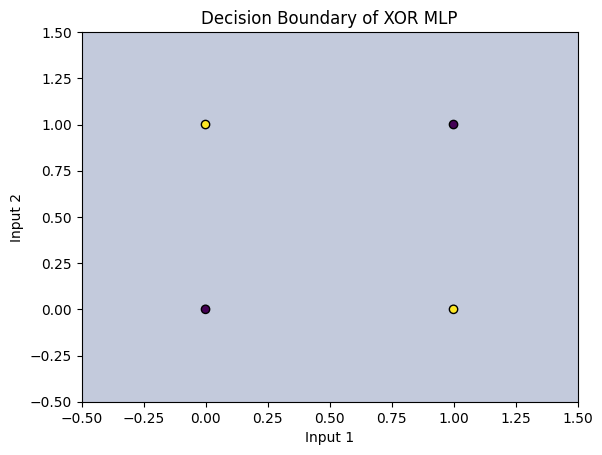

done with hidden size:- 1
-------------------------------------------------
Learning Start with hidden size:- 2
Epoch 0: Loss = 0.5
Epoch 1000: Loss = 0.5
Epoch 2000: Loss = 0.5
Epoch 3000: Loss = 0.5
Epoch 4000: Loss = 0.5
Epoch 5000: Loss = 0.5
Epoch 6000: Loss = 0.5
Epoch 7000: Loss = 0.5
Epoch 8000: Loss = 0.5
Epoch 9000: Loss = 0.5
Accuracy: 50.00%
Confusion Matrix:
[[0 2]
 [0 2]]


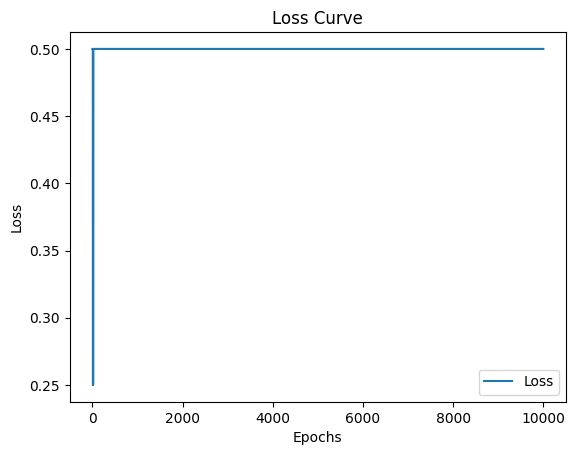

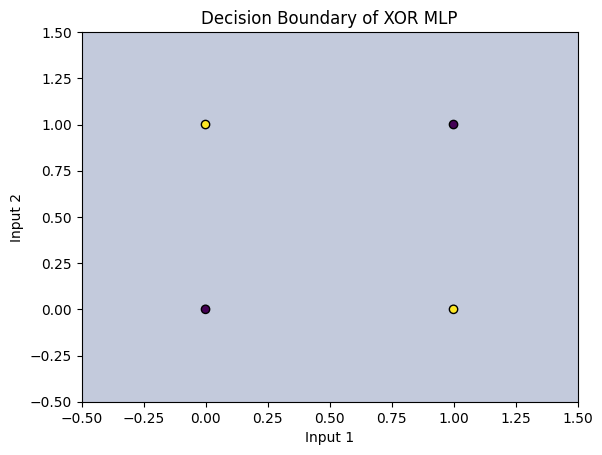

done with hidden size:- 2
-------------------------------------------------
Learning Start with hidden size:- 3
Epoch 0: Loss = 0.5
Epoch 59: Loss = 0.0
Accuracy: 100.00%
Confusion Matrix:
[[2 0]
 [0 2]]


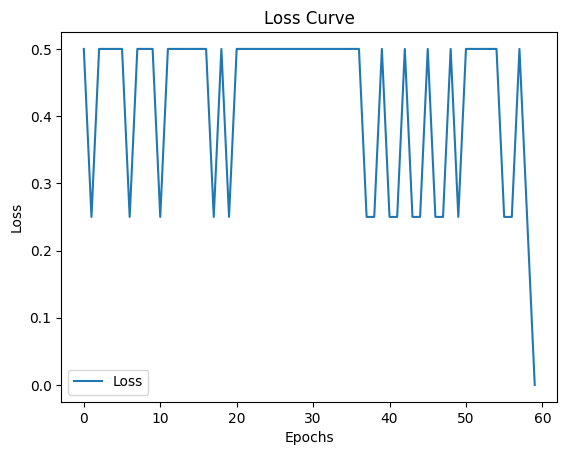

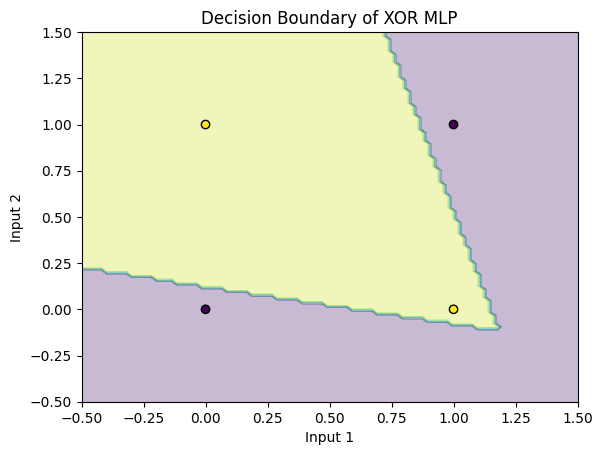

done with hidden size:- 3
-------------------------------------------------
Learning Start with hidden size:- 4
Epoch 0: Loss = 0.5
Epoch 1000: Loss = 0.5
Epoch 2000: Loss = 0.5
Epoch 3000: Loss = 0.5
Epoch 4000: Loss = 0.5
Epoch 5000: Loss = 0.5
Epoch 6000: Loss = 0.5
Epoch 7000: Loss = 0.5
Epoch 8000: Loss = 0.5
Epoch 9000: Loss = 0.5
Accuracy: 50.00%
Confusion Matrix:
[[0 2]
 [0 2]]


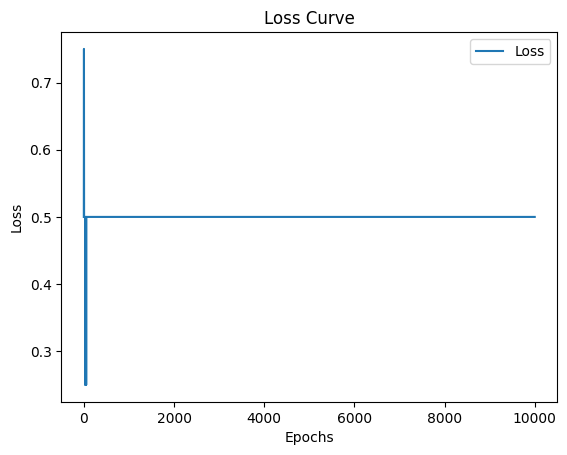

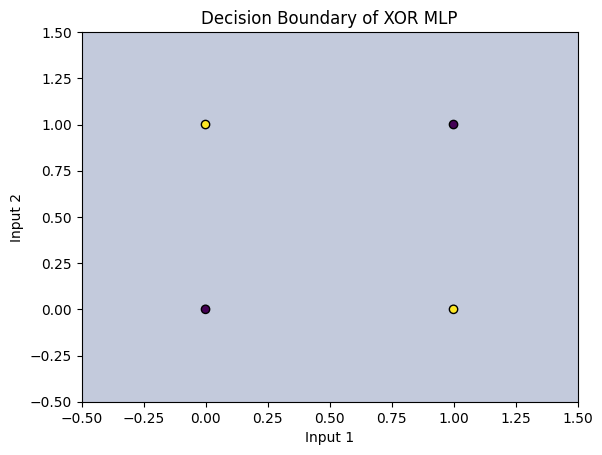

done with hidden size:- 4
-------------------------------------------------
Learning Start with hidden size:- 5
Epoch 0: Loss = 0.5
Epoch 26: Loss = 0.0
Accuracy: 100.00%
Confusion Matrix:
[[2 0]
 [0 2]]


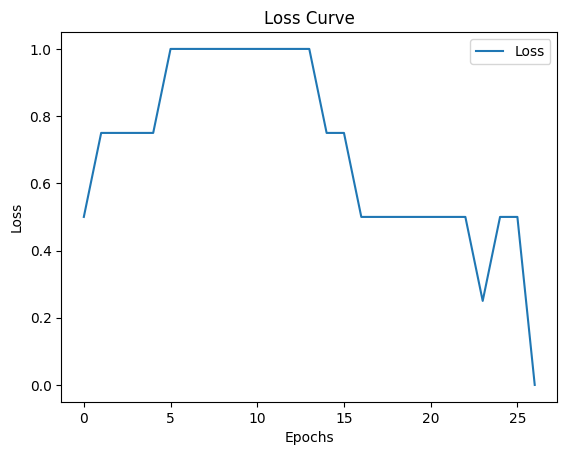

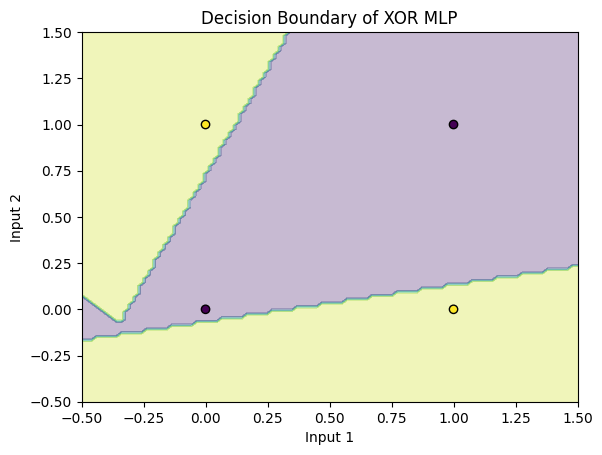

done with hidden size:- 5
-------------------------------------------------


In [ ]:
# Initialize dataset (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

for i in range(5):
    print(f"Learning Start with hidden size:- {i+1}")
    test_mlp(hidden_size=i+1, learning_rate=0.1, epochs=10000)
    print(f"done with hidden size:- {i+1}")
    print("-------------------------------------------------")